#### Visualization Utiliies

In [107]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

import matplotlib.pyplot as plt
def plot_landmarks(detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  ax3d = plt.axes(projection='3d')
  fig, ax2d = plt.subplots()

  # Loop through the detected poses to visualize.
  # for idx in range(len(pose_landmarks_list)):
  pose_landmarks = pose_landmarks_list[0]

  # Draw the pose landmarks.
  landmark_x = []
  landmark_y = []
  landmark_z = []

  for landmark in pose_landmarks:
    landmark_x.append(landmark.x)
    landmark_y.append(1 - landmark.y)
    landmark_z.append(landmark.z)

  for connection in solutions.pose.POSE_CONNECTIONS:
    x_values = [landmark_x[connection[0]], landmark_x[connection[1]]]
    y_values = [landmark_y[connection[0]], landmark_y[connection[1]]]
    z_values = [landmark_z[connection[0]], landmark_z[connection[1]]]
    plt.plot(x_values, y_values, linestyle="--")
    ax3d.plot(x_values, z_values, y_values, linestyle=":")

  ax3d.view_init(0, 0, 0)
  # Data for three-dimensional scattered points
  ax3d.scatter(landmark_x, landmark_z, landmark_y)
  ax2d.scatter(landmark_x, landmark_y)
  

#### Running Inference

In [108]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=False)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("images/image.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

#### Visualize Results

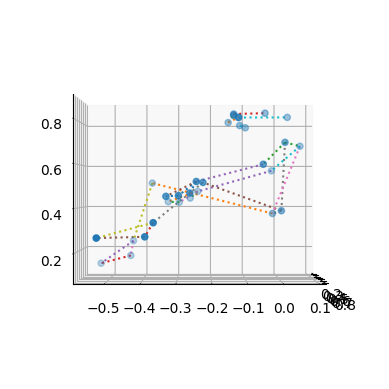

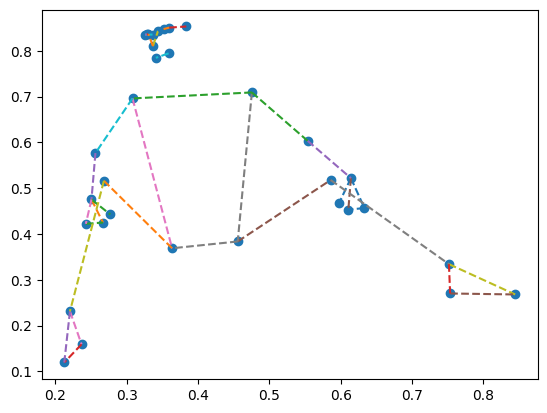

In [109]:
plot_landmarks(detection_result)

In [110]:
# annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
# cv2.imshow('annotated-image', cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
# cv2.waitKey(0)
# cv2.destroyAllWindows()